# Python

In [41]:
import pandas as pd

# Load the Stata dataset
url = "https://github.com/muzaale/forum/raw/main/esrdRisk_t02tT.dta"
data = pd.read_stata(url)

# Save the dataset as a CSV file
data.to_csv('esrdRisk_t02tT.csv', index=False)

print("CSV file saved as 'esrdRisk_t02tT.csv'")


CSV file saved as 'esrdRisk_t02tT.csv'


In [42]:
import pandas as pd

# Load the CSV dataset
data = pd.read_csv('./esrdRisk_t02tT.csv', low_memory=False)

# Print unique values in 'rSMGJcEdF_d'
print(data['rSMGJcEdF_d'].unique())


['Censored' 'Died' 'ESRD']


In [44]:
import pandas as pd

# Load the CSV dataset
data = pd.read_csv('./esrdRisk_t02tT.csv', low_memory=False)

# Display basic information about the dataset
print("Dataset information:")
print(data.info())

Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113657 entries, 0 to 113656
Data columns (total 40 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   pers_id             113657 non-null  int64  
 1   don_id              96217 non-null   object 
 2   don_yearcat         96217 non-null   object 
 3   don_age             113657 non-null  int64  
 4   don_agecat          113657 non-null  object 
 5   don_female          113657 non-null  object 
 6   don_race_ethn       113599 non-null  object 
 7   don_educat          72127 non-null   object 
 8   don_hyperten        63736 non-null   object 
 9   don_smoke           59119 non-null   object 
 10  don_bmi             86983 non-null   float64
 11  don_bmicat          86983 non-null   object 
 12  don_bp_preop_syst   82898 non-null   float64
 13  don_sbpcat          82898 non-null   object 
 14  don_bp_preop_diast  82857 non-null   float64
 15  don_dbpcat   

In [45]:

# Display the first few rows of the dataset to understand its structure
print("\nFirst few rows of the dataset:")
print(data.head())


First few rows of the dataset:
   pers_id   don_id don_yearcat  don_age don_agecat don_female don_race_ethn  \
0  5005738  AAEN566   1998-2001       44      40-49     Female   White/Other   
1  4973528   ZIF796   2002-2005       47      40-49     Female   White/Other   
2  4961779   ZFV631   2002-2005       38      18-39     Female      Hispanic   
3  4961603   ZFN933   2006-2009       38      18-39       Male      Hispanic   
4  4949318   ZCU948   1998-2001       18      18-39     Female   White/Other   

    don_educat don_hyperten  don_smoke  ...  rSMGJcEdF_t rSMGJcEdF_x  age_t0  \
0          NaN   No History     Smoker  ...    11.192334         rSM      44   
1  <HighSchool          NaN  NoHistory  ...     6.743327         rSM      47   
2  <HighSchool   No History  NoHistory  ...     6.086242         rSM      38   
3  <HighSchool   No History  NoHistory  ...     5.607119         rSM      38   
4          NaN   No History  NoHistory  ...    11.731690         rSM      18   

      

In [47]:
# Total number of observations and variables
num_observations = data.shape[0]
num_variables = data.shape[1]
print(f"\nTotal number of observations: {num_observations}")
print(f"Total number of variables: {num_variables}")


Total number of observations: 113657
Total number of variables: 40


In [48]:
# Display the outcome of interest and its format
print("\nOutcome of interest (rSMGJcEdF_d) and its format:")
print(data['rSMGJcEdF_d'].value_counts(dropna=False))


Outcome of interest (rSMGJcEdF_d) and its format:
rSMGJcEdF_d
Censored    108448
Died          4939
ESRD           270
Name: count, dtype: int64


In [49]:


# Display the start time (rSMGJcEdF_t0) and end time (rSMGJcEdF_tT) for survival analysis
print("\nStart time (rSMGJcEdF_t0):")
print(data['rSMGJcEdF_t0'].head())
print("\nEnd time (rSMGJcEdF_tT):")
print(data['rSMGJcEdF_tT'].head())



Start time (rSMGJcEdF_t0):
0    2000-09-20
1    2005-03-03
2    2005-10-29
3    2006-04-22
4    2000-03-07
Name: rSMGJcEdF_t0, dtype: object

End time (rSMGJcEdF_tT):
0    2014-07-31
1    2014-07-31
2    2014-07-31
3    2014-07-31
4    2014-07-31
Name: rSMGJcEdF_tT, dtype: object


In [51]:
import pandas as pd
import numpy as np
from lifelines import KaplanMeierFitter
import matplotlib.pyplot as plt

# Load the CSV dataset
data = pd.read_csv('./esrdRisk_t02tT.csv', low_memory=False)

# Convert date columns to datetime
data['rSMGJcEdF_t0'] = pd.to_datetime(data['rSMGJcEdF_t0'])
data['rSMGJcEdF_tT'] = pd.to_datetime(data['rSMGJcEdF_tT'])

# Calculate follow-up time in years
data['duration'] = (data['rSMGJcEdF_tT'] - data['rSMGJcEdF_t0']).dt.days / 365.25

# Map non-numeric values to numeric
value_mapping = {'Censored': 0, 'Died': 0, 'ESRD': 1}
data['rSMGJcEdF_d'] = data['rSMGJcEdF_d'].replace(value_mapping).astype(int)

# Apply the same date restrictions as in Stata
data.loc[data['rSMGJcEdF_tT'] > '2011-12-31', 'rSMGJcEdF_d'] = 0
data.loc[data['rSMGJcEdF_tT'] > '2011-12-31', 'rSMGJcEdF_tT'] = pd.to_datetime('2011-12-31')
data.loc[(data['rSMGJcEdF_t0'] < '1994-01-01') & (data['rSMGJcEdF_tT'] > '1994-01-01'), 'rSMGJcEdF_t0'] = pd.to_datetime('1994-01-01')

# Recalculate duration after date adjustments
data['duration'] = (data['rSMGJcEdF_tT'] - data['rSMGJcEdF_t0']).dt.days / 365.25

# Create the 'event' column (rSMGJcEdF_d == 1 indicates an event)
data['event'] = data['rSMGJcEdF_d'] == 1

# Filter relevant columns and drop rows with missing values
data = data[['duration', 'event', 'donor']].dropna()

# Display the processed data
print("\nProcessed data:")
print(data.info())
print(data.head())



Processed data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113657 entries, 0 to 113656
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   duration  113657 non-null  float64
 1   event     113657 non-null  bool   
 2   donor     113657 non-null  object 
dtypes: bool(1), float64(1), object(1)
memory usage: 1.8+ MB
None
    duration  event  donor
0  11.277207  False  Donor
1   6.828200  False  Donor
2   6.171116  False  Donor
3   5.691992  False  Donor
4  11.816564  False  Donor


/var/folders/z3/nwmg00j178vfczmb9nk9487h0000gn/T/ipykernel_38652/812990944.py:18: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['rSMGJcEdF_d'] = data['rSMGJcEdF_d'].replace(value_mapping).astype(int)


/var/folders/z3/nwmg00j178vfczmb9nk9487h0000gn/T/ipykernel_38652/1010938149.py:18: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['rSMGJcEdF_d'] = data['rSMGJcEdF_d'].replace(value_mapping).astype(int)



Donor categories:
donor
Living donor          96217
Healthy nondonor      12208
General population     5232
Name: count, dtype: int64

Event counts (ESRD):
event
False    113387
True        270
Name: count, dtype: int64

Processed data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113657 entries, 0 to 113656
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   duration  113657 non-null  float64
 1   event     113657 non-null  bool   
 2   donor     113657 non-null  object 
dtypes: bool(1), float64(1), object(1)
memory usage: 1.8+ MB
None
    duration  event         donor
0  11.277207  False  Living donor
1   6.828200  False  Living donor
2   6.171116  False  Living donor
3   5.691992  False  Living donor
4  11.816564  False  Living donor


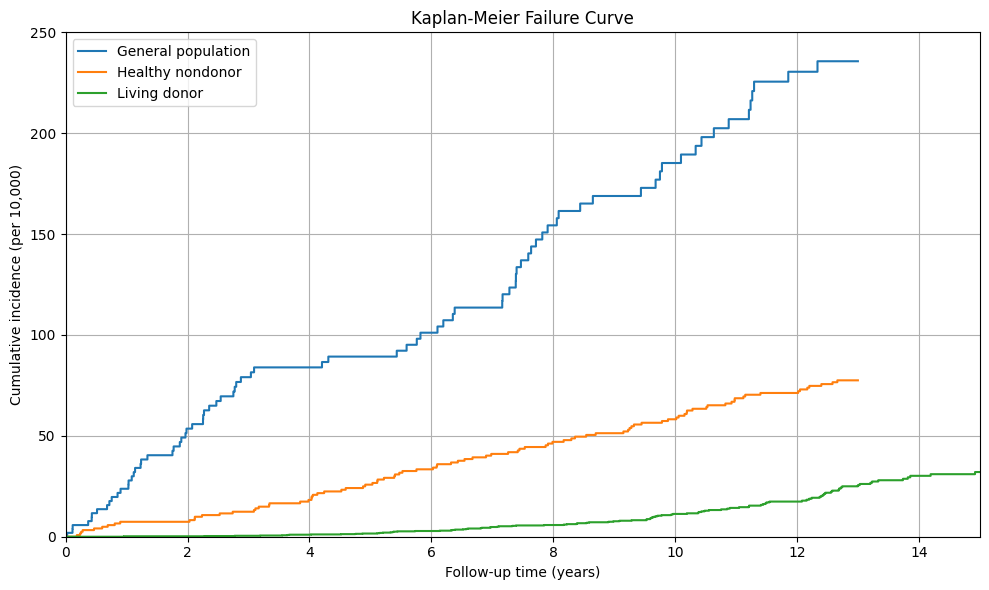


General population:
  5 years: 89.28 per 10,000
  12 years: 230.46 per 10,000
  15 years: 235.67 per 10,000

Healthy nondonor:
  5 years: 25.81 per 10,000
  12 years: 71.25 per 10,000
  15 years: 77.51 per 10,000

Living donor:
  5 years: 1.58 per 10,000
  12 years: 17.42 per 10,000
  15 years: 32.06 per 10,000


In [74]:
import pandas as pd
import numpy as np
from lifelines import KaplanMeierFitter
import matplotlib.pyplot as plt

# Load the CSV dataset
data = pd.read_csv('./esrdRisk_t02tT.csv', low_memory=False)

# Convert date columns to datetime
data['rSMGJcEdF_t0'] = pd.to_datetime(data['rSMGJcEdF_t0'])
data['rSMGJcEdF_tT'] = pd.to_datetime(data['rSMGJcEdF_tT'])

# Calculate follow-up time in years
data['duration'] = (data['rSMGJcEdF_tT'] - data['rSMGJcEdF_t0']).dt.days / 365.25

# Map non-numeric values to numeric
value_mapping = {'Censored': 0, 'Died': 0, 'ESRD': 1}
data['rSMGJcEdF_d'] = data['rSMGJcEdF_d'].replace(value_mapping).astype(int)

# Apply the same date restrictions as in Stata
data.loc[data['rSMGJcEdF_tT'] > '2011-12-31', 'rSMGJcEdF_d'] = 0
data.loc[data['rSMGJcEdF_tT'] > '2011-12-31', 'rSMGJcEdF_tT'] = pd.to_datetime('2011-12-31')
data.loc[(data['rSMGJcEdF_t0'] < '1994-01-01') & (data['rSMGJcEdF_tT'] > '1994-01-01'), 'rSMGJcEdF_t0'] = pd.to_datetime('1994-01-01')

# Recalculate duration after date adjustments
data['duration'] = (data['rSMGJcEdF_tT'] - data['rSMGJcEdF_t0']).dt.days / 365.25

# Create the 'event' column (rSMGJcEdF_d == 1 indicates an event)
data['event'] = data['rSMGJcEdF_d'] == 1

# Create the 'donor' column with three categories
data['donor'] = np.where(data['don_id'].notna(), 'Living donor', 
                         np.where(data['don_id'].isna() & (data['don_age'] <= 60), 'Healthy nondonor', 'General population'))

# Verify the donor categories
print("\nDonor categories:")
print(data['donor'].value_counts())

# Verify the event counts (ESRD)
print("\nEvent counts (ESRD):")
print(data['event'].value_counts())

# Filter relevant columns and drop rows with missing values
data = data[['duration', 'event', 'donor']].dropna()

# Ensure 'duration' and 'event' are numeric
data['duration'] = pd.to_numeric(data['duration'], errors='coerce')
data['event'] = pd.to_numeric(data['event'], errors='coerce')

# Display the processed data
print("\nProcessed data:")
print(data.info())
print(data.head())

# Fit the Kaplan-Meier estimator for each group
kmf = KaplanMeierFitter()

# Initialize the plot
plt.figure(figsize=(10, 6))

# Plot the Kaplan-Meier curves for each group
for label, group in data.groupby('donor'):
    kmf.fit(group['duration'], event_observed=group['event'], label=label)
    plt.step(kmf.timeline, 10000 * (1 - kmf.survival_function_), where="post", label=label)

# Set axis limits and labels
plt.ylim(0, 40)
plt.xlim(0, 15)
plt.xlabel('Follow-up time (years)')
plt.ylabel('Cumulative incidence (per 10,000)')
plt.title('Kaplan-Meier Failure Curve')
plt.grid(True)

# Add legend
plt.legend(loc='upper left')

# Add y-axis ticks
plt.yticks(range(0, 300, 50))

plt.tight_layout()
plt.savefig('./KM_plot.png', dpi=300, bbox_inches='tight')
plt.show()

# Print cumulative incidence at 5, 12, and 15 years
for label, group in data.groupby('donor'):
    kmf.fit(group['duration'], event_observed=group['event'])
    print(f"\n{label}:")
    for year in [5, 12, 15]:
        ci = 10000 * (1 - kmf.survival_function_at_times(year).iloc[0])
        print(f"  {year} years: {ci:.2f} per 10,000")


/var/folders/z3/nwmg00j178vfczmb9nk9487h0000gn/T/ipykernel_38652/2454471136.py:18: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['status'] = data['rSMGJcEdF_d'].replace(value_mapping).astype(int)


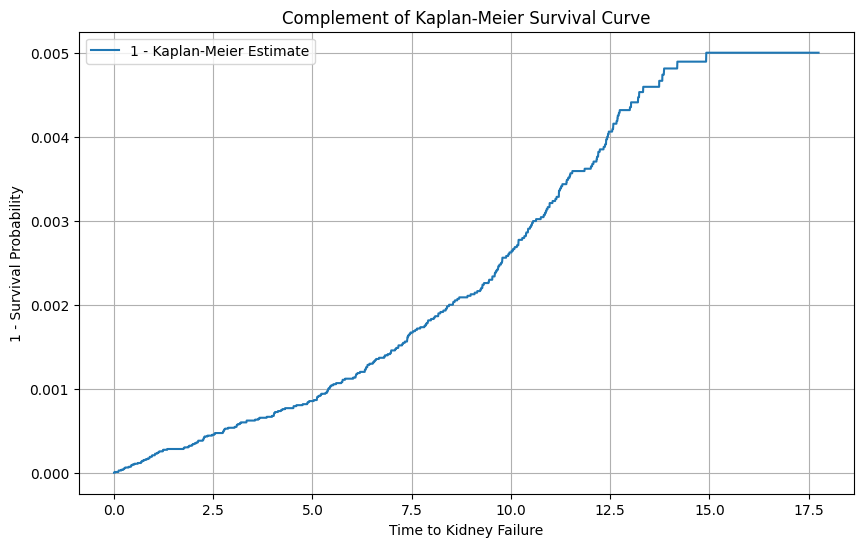

Columns 'don_id' or 'don_age' not found in the dataset.


In [78]:
import pandas as pd
import numpy as np
from lifelines import KaplanMeierFitter
import matplotlib.pyplot as plt

# Load the CSV dataset
data = pd.read_csv('./esrdRisk_t02tT.csv', low_memory=False)

# Convert date columns to datetime
data['rSMGJcEdF_t0'] = pd.to_datetime(data['rSMGJcEdF_t0'])
data['rSMGJcEdF_tT'] = pd.to_datetime(data['rSMGJcEdF_tT'])

# Calculate follow-up time in years
data['time_to_failure'] = (data['rSMGJcEdF_tT'] - data['rSMGJcEdF_t0']).dt.days / 365.25

# Map non-numeric values to numeric for event_observed
value_mapping = {'Censored': 0, 'Died': 0, 'ESRD': 1}
data['status'] = data['rSMGJcEdF_d'].replace(value_mapping).astype(int)

# Apply the same date restrictions as in Stata
data.loc[data['rSMGJcEdF_tT'] > '2011-12-31', 'rSMGJcEdF_d'] = 0
data.loc[data['rSMGJcEdF_tT'] > '2011-12-31', 'rSMGJcEdF_tT'] = pd.to_datetime('2011-12-31')
data.loc[(data['rSMGJcEdF_t0'] < '1994-01-01') & (data['rSMGJcEdF_tT'] > '1994-01-01'), 'rSMGJcEdF_t0'] = pd.to_datetime('1994-01-01')

# Recalculate duration after date adjustments
data['time_to_failure'] = (data['rSMGJcEdF_tT'] - data['rSMGJcEdF_t0']).dt.days / 365.25

# Filter relevant columns and drop rows with missing values
data = data[['time_to_failure', 'status']].dropna()

# Instantiate the KaplanMeierFitter
kmf = KaplanMeierFitter()

# Fit the data into the model
kmf.fit(data['time_to_failure'], event_observed=data['status'])

# Get the survival function
survival_function = kmf.survival_function_

# Compute 1 minus the survival function
complement_survival_function = 1 - survival_function

# Plot the complement of the Kaplan-Meier survival curve
plt.figure(figsize=(10, 6))
plt.plot(complement_survival_function, label='1 - Kaplan-Meier Estimate')
plt.title('Complement of Kaplan-Meier Survival Curve')
plt.xlabel('Time to Kidney Failure')
plt.ylabel('1 - Survival Probability')
plt.legend()
plt.grid(True)
plt.savefig('1_min_KM.png')
plt.show()

# Check if 'don_id' and 'don_age' columns exist
if 'don_id' in data.columns and 'don_age' in data.columns:
    # Create the 'donor' column with three categories
    data['donor'] = np.where(data['don_id'].notna(), 'Living donor', 
                             np.where(data['don_id'].isna() & (data['don_age'] <= 60), 'Healthy nondonor', 'General population'))

    # Verify the donor categories
    print("\nDonor categories:")
    print(data['donor'].value_counts())

    # Verify the event counts (ESRD)
    print("\nEvent counts (ESRD):")
    print(data['event'].value_counts())

    # Filter relevant columns and drop rows with missing values
    data = data[['time_to_failure', 'status', 'donor']].dropna()

    # Fit the Kaplan-Meier estimator for each group
    kmf = KaplanMeierFitter()

    # Initialize the plot
    plt.figure(figsize=(10, 6))

    # Plot the Kaplan-Meier curves for each group
    for label, group in data.groupby('donor'):
        kmf.fit(group['time_to_failure'], event_observed=group['status'], label=label)
        plt.step(kmf.timeline, 10000 * (1 - kmf.survival_function_), where="post", label=label)

    # Set axis limits and labels
    plt.ylim(0, 40)
    plt.xlim(0, 15)
    plt.xlabel('Follow-up time (years)')
    plt.ylabel('Cumulative incidence (per 10,000)')
    plt.title('Kaplan-Meier Failure Curve')
    plt.grid(True)

    # Add legend
    plt.legend(loc='upper left')

    # Add y-axis ticks
    plt.yticks(range(0, 300, 50))

    plt.tight_layout()
    plt.savefig('./KM_plot.png', dpi=300, bbox_inches='tight')
    plt.show()

    # Print cumulative incidence at 5, 12, and 15 years
    for label, group in data.groupby('donor'):
        kmf.fit(group['time_to_failure'], event_observed=group['status'])
        print(f"\n{label}:")
        for year in [5, 12, 15]:
            ci = 10000 * (1 - kmf.survival_function_at_times(year).iloc[0])
            print(f"  {year} years: {ci:.2f} per 10,000")
else:
    print("Columns 'don_id' or 'don_age' not found in the dataset.")


/var/folders/z3/nwmg00j178vfczmb9nk9487h0000gn/T/ipykernel_38652/4095442099.py:18: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['status'] = data['rSMGJcEdF_d'].replace(value_mapping).astype(int)


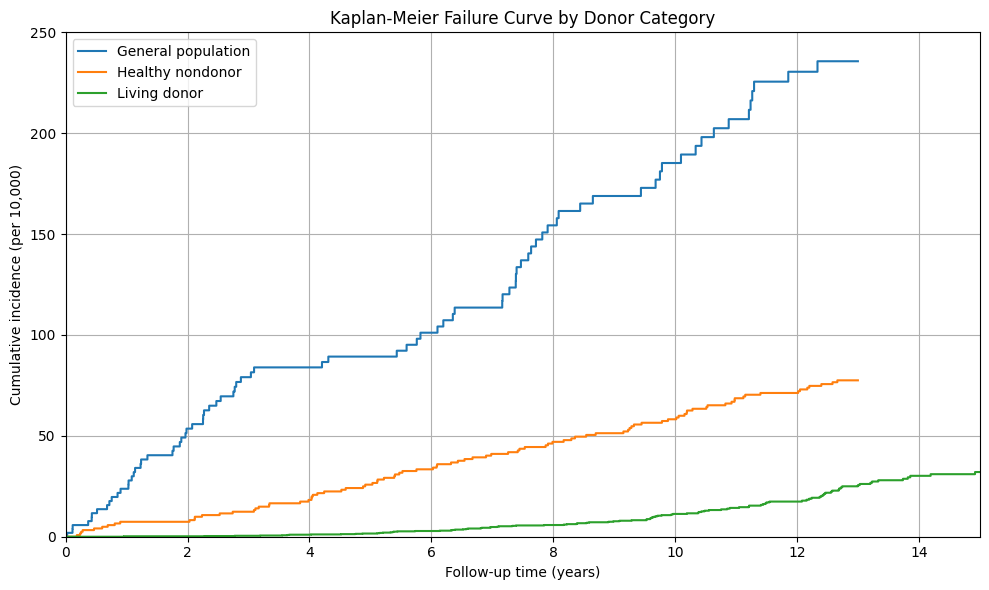

In [79]:
import pandas as pd
import numpy as np
from lifelines import KaplanMeierFitter
import matplotlib.pyplot as plt

# Load the CSV dataset
data = pd.read_csv('./esrdRisk_t02tT.csv', low_memory=False)

# Convert date columns to datetime
data['rSMGJcEdF_t0'] = pd.to_datetime(data['rSMGJcEdF_t0'])
data['rSMGJcEdF_tT'] = pd.to_datetime(data['rSMGJcEdF_tT'])

# Calculate follow-up time in years
data['time_to_failure'] = (data['rSMGJcEdF_tT'] - data['rSMGJcEdF_t0']).dt.days / 365.25

# Map non-numeric values to numeric for event_observed
value_mapping = {'Censored': 0, 'Died': 0, 'ESRD': 1}
data['status'] = data['rSMGJcEdF_d'].replace(value_mapping).astype(int)

# Apply the same date restrictions as in Stata
data.loc[data['rSMGJcEdF_tT'] > '2011-12-31', 'rSMGJcEdF_d'] = 0
data.loc[data['rSMGJcEdF_tT'] > '2011-12-31', 'rSMGJcEdF_tT'] = pd.to_datetime('2011-12-31')
data.loc[(data['rSMGJcEdF_t0'] < '1994-01-01') & (data['rSMGJcEdF_tT'] > '1994-01-01'), 'rSMGJcEdF_t0'] = pd.to_datetime('1994-01-01')

# Recalculate duration after date adjustments
data['time_to_failure'] = (data['rSMGJcEdF_tT'] - data['rSMGJcEdF_t0']).dt.days / 365.25

# Create the 'donor' column with three categories
if 'don_id' in data.columns and 'don_age' in data.columns:
    data['donor'] = np.where(data['don_id'].notna(), 'Living donor', 
                             np.where(data['don_id'].isna() & (data['don_age'] <= 60), 'Healthy nondonor', 'General population'))

    # Filter relevant columns and drop rows with missing values
    data = data[['time_to_failure', 'status', 'donor']].dropna()

    # Fit the Kaplan-Meier estimator for each group
    kmf = KaplanMeierFitter()

    # Initialize the plot
    plt.figure(figsize=(10, 6))

    # Plot the Kaplan-Meier curves for each group
    for label, group in data.groupby('donor'):
        kmf.fit(group['time_to_failure'], event_observed=group['status'], label=label)
        plt.step(kmf.timeline, 10000 * (1 - kmf.survival_function_), where="post", label=label)

    # Set axis limits and labels
    plt.ylim(0, 40)
    plt.xlim(0, 15)
    plt.xlabel('Follow-up time (years)')
    plt.ylabel('Cumulative incidence (per 10,000)')
    plt.title('Kaplan-Meier Failure Curve by Donor Category')
    plt.grid(True)

    # Add legend
    plt.legend(loc='upper left')

    # Add y-axis ticks
    plt.yticks(range(0, 300, 50))

    plt.tight_layout()
    plt.savefig('./KM_plot_by_donor.png', dpi=300, bbox_inches='tight')
    plt.show()
else:
    print("Columns 'don_id' or 'don_age' not found in the dataset.")
